In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train,y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape ',x_train.shape)

x_train.shape  (50000, 32, 32, 3)


In [ ]:
k = len(set(y_train))
print('no. of classes ',k)

no. of classes  10


In [ ]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i,x)



In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 18s 4ms/step - loss: 1.5685 - accuracy: 0.4256 - val_loss: 1.2982 - val_accuracy: 0.5373
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2844 - accuracy: 0.5395 - val_loss: 1.1114 - val_accuracy: 0.6037
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1580 - accuracy: 0.5840 - val_loss: 1.0633 - val_accuracy: 0.6191
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0677 - accuracy: 0.6186 - val_loss: 0.9818 - val_accuracy: 0.6524
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9903 - accuracy: 0.6508 - val_loss: 0.9395 - val_accuracy: 0.6724
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9324 - accuracy: 0.6661 - val_loss: 0.9146 - val_accuracy: 0.6858
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8748 - accuracy: 0.6897 - val_loss: 0.8930 - val_accuracy

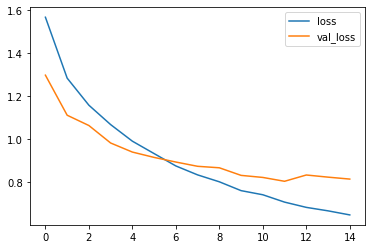

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

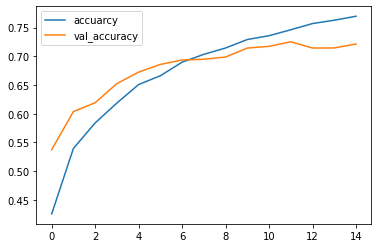

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuarcy')
plt.plot(r.history['val_accuracy'], label ='val_accuracy')
plt.legend()

true label is 4 predicted is 6


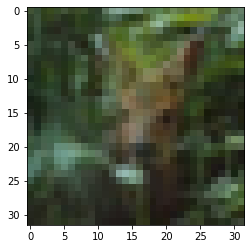

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
miss_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(miss_idx)
plt.imshow(x_test[i],cmap='gray')
print('true label is {} predicted is {}'.format(y_test[i],p_test[i]))

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8135 - accuracy: 0.7213


[0.8134695887565613, 0.7213000059127808]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred=model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification report\n ",classification_report(y_test,y_pred_classes))

classification report
                precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.86      0.82      0.84      1000
           2       0.70      0.55      0.62      1000
           3       0.59      0.48      0.53      1000
           4       0.69      0.65      0.67      1000
           5       0.65      0.62      0.64      1000
           6       0.69      0.84      0.76      1000
           7       0.74      0.80      0.77      1000
           8       0.78      0.84      0.81      1000
           9       0.76      0.83      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

